### 다항 회귀 Polynominal Regression

#### 공부 시간에 따른 시험 점수(우등생)

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
dataset = pd.read_csv("C://Users//wkdal//Desktop//archive//PythonMLWorkspace(LightWeight)//ScikitLearn//PolynomialRegressionData.csv")

In [106]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [107]:
# 이번에는 전체 데이터로 모델을 만들어보겠다. (훈련, 테스트 분리x)

In [108]:
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


### 단순 선형 회귀(simple linear regression)
으로 사용해 비교해보자.

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

# TypeError: fit() missing 1 required positional argument: 'y'



LinearRegression()

In [110]:
### 시각화(전체)

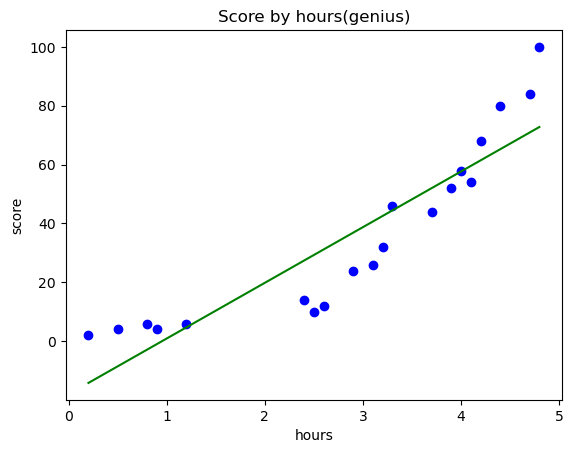

In [111]:
plt.scatter(X,Y,color='blue')
plt.plot(X,reg.predict(X),color = 'green')  #x는 입력값 #y는 예측값 ->예측 직선
plt.title('Score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

# 커브가 들어가지 않는 선임을 확인했따.

In [112]:
reg.score(X,Y)

0.8169296513411765

In [113]:
# 816...나쁜 점수는 아니지만 썩 좋은 점수는 아니다.

### 다항 회귀(Polynomial Regression)

다항 회귀는 사이킷런에서 따로, 클래스를 제공해 주지 않는다.
그래서 우리가 독립변수 X피처를 다항식에 맞게 바꾼 다음에 선형 회귀를 적용하는 식으로해야한다.
이 때 사용하는 클래스가 폴리너미얼 클래스가 있다.

In [114]:
from sklearn.preprocessing import PolynomialFeatures
#몇 차 다항식으로 할지 설정 가능하다.(아래)

poly_reg = PolynomialFeatures(degree=4)
# 폴리노미얼 디그리 속성을 2로 만든다. 2차 다항식이 됨.

In [115]:
X_poly = poly_reg.fit_transform(X) #전체 데이터 X를 넣어서 피쳐 변환을 해준다.
# fit()
# transform()으로 해도된다.
# 여기서 fit은 새롭게 만들 피쳐들의 조합을 찾고
# 트랜스폼은 실제로 데이터를 변환하는 작업을 한다.
# 근데 한줄로 위와 같이 사이킷런에서 제공한다.


In [116]:
X_poly[:5]

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [117]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [118]:
# 원래의 공부시간 X와 X_poly(다항식)으로 피쳐가 확장된 것을 확인할 수 있다.
# 0.2에서 1 , 0.2 , 0.04로 확장됨.

In [119]:
# 확장되는 의미는 우리가 확장한 degree에 맞게
# x의 0승 x의 1승 x의 2승까지 피쳐로 만든 것이다.
# 디그리가 4로하면, x의 0승 x의 1승.. x의 4승이 차수에 맞게 데이터가 변환이 된다.

In [120]:
# 그러니깐
# 위의 X_poly[:5] # [x] -> [x^0 x^1 x^2] -> x가 3이라면[1,3,9]로 변환되는것이다.

In [121]:
poly_reg.get_feature_names_out()
#다항 항들의 이름을 배열로 보여주는 함수

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [122]:
#'1'	x⁰ = 1	상수항 (절편 bias 항)
#'x0'	x¹	첫 번째 특성(변수) x0의 1제곱 = 원래 특성
#'x0^2'	x²	첫 번째 특성 x0의 2제곱 = 제곱 특성

In [123]:
# 다시 선형 회귀를 적용하면된다.
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y) #변환된 전체 X와 Y로실행

LinearRegression()

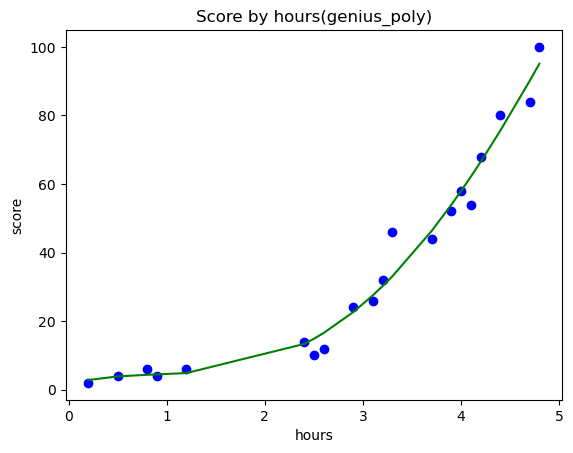

In [124]:
## 데이터 시각화(변환된X와 Y)
plt.scatter(X,Y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color = 'green')
# X는 그대로 쓰는데, y가 바껴야된다.
plt.title('Score by hours(genius_poly)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [125]:
# 곡선이 되니, 잔차가 많이 해결된 것 같다.
# 하지만 선이 뚝뚝 끊기는 것 같고, x데이터가 많이없어서 그렇다
# 넘파이의 도움을 받아야한다.
    # 넘파이에서 np.arrage()를 호출해서 범위를 지정한다.
    # x의 최솟값과 최댓값을잘게 쪼개서 확 늘려버린당

In [126]:
X_range = np.arange(min(X),max(X), 0.1) #X의 범위인 최솟값 최댓값을 0.1단위로 해서 생성
X_range

# 0.2. 0.3 0.4 ....0.1씩 커지다가 최댓값이 4.7이 됬다.

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [127]:
X_range.shape

# 46개이 데이터가 1차원 배열로 있는 상태임

(46,)

In [128]:
# 우리가 원래 썼더 X데이터를 가져오면?

X[:5]  #5개만 가져오자

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [129]:
# 그래서 엑스레인지를 형태를 맞춰야한다.

X_range = X_range.reshape(-1,1)  # 첫번째 값은 로우 개수, 두번 째 개수는 컬럼 값
# -1은 자동으로 로우 개수를 세줌. == len(X_range)
# 1을 넣어주면 전체 데이터에 대해서 컬럼 한개를 만들고,
# 로우는 그에 해당하는 만큼 자동으로 만든것.

In [130]:
X_range.shape

(46, 1)

In [131]:
X.shape
# 데이터 타입은 같음

(20, 1)

In [132]:
X_range[:5]
#2차원 데이터 형태인 것을 확인할 수 있다.

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

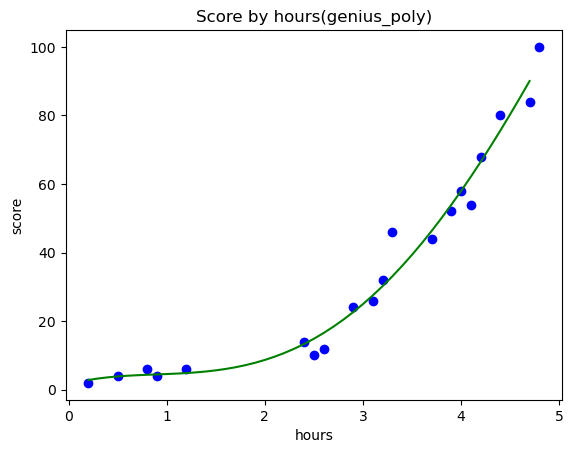

In [133]:
# 그러면 X_ragne를 써서 데이터를 그대로 표현해보자

#스케터는 똑같고,x를 부드럽게하기위해 x가 많아진 것이기 때문에

plt.scatter(X,Y,color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)),color = 'green')
# X는 그대로 쓰는데, y가 바껴야된다.
plt.title('Score by hours(genius_poly)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시험 성적 예측


In [134]:
reg.predict([[2]])  #2시간을 공부했으 때 선형 회귀 모델의 예측값



#scikit-learn의 .predict() 함수는 입력 X는 항상 2차원 배열이어야 하기 때문입니다.
#즉, 구조는 반드시:

#(샘플 개수, 특성 개수) = (행, 열)

#🔍 구조 비교
#입력 형태	의미	설명
#[2]	(1,)	1차원 → 에러 발생 가능
#[[2]]	(1, 1)	2차원 → ✔ OK
#[[2], [3], [4]]	(3, 1)	3개의 샘플, 특성 1개

array([19.85348988])

In [135]:
# 실제 위의 시각화를 보면, 2시간 공부했을 때 값이  조금 과한것 처럼 보인다.
# 그렇다면, 다항회귀 모델에서 점수를 계산해보자.

In [136]:
lin_reg.predict(poly_reg.fit_transform([[2]]))
#2시간을 공부했을 때 다항 회귀 모델이다.
# 7.05..점수 모델이 나온다. 단순회귀 모델의 점수보다는 낮지만, 더 근접한 값(시각화)인 것을
# 확인할 수 있다.



# 디그리를 4 10 8 ..이런식으로 변경해서 시각화와 점수를 계속 확인
# 예측을 잘해도, 이상현상이 생기는 과대 적합, 과소적합을 확인해야한다.
# 예측률이 높더라도, 일반적인 실제 데이터가 들어오면 엉터리 예측값이 나온다.
# 훈련 데이터는 잘 나와도 테스트 데이터는 잘 안나올 수 있다.
# 이런 점을 항상 주의한다.


array([8.70559135])

### 점수 확인

In [137]:
# 단순 선형 회귀 모델의 점수는 (   )이다.
# 새로 만든 다항 회귀 모델의 점수는?

lin_reg.score(X_poly,Y)

0.9782775579000045

In [138]:
# 97점정도 나왔따. 단순선형회귀모델보다 높다.